### Topic Evaluation

This notebook contains several codes to analyze and evaluate the topics that are extracted by training LDA.
Some of them (important ones) are mentioned in the paper, such as topic distribution or dominant topic frequency.
Some other do not appear in the paper but are somewhat insightful for instance, the word contribution 
histogram for each topic, that shows the sorted counts of each of the ten keywords in the corpus.

The results can be used to see how strong topic boundaries are, how similar the topics are etc. 
The codes do not give any insight into interpreting topics regarding to Kafka's writing, but give a 
somewhat acceptable basis for a later usage of these topics in the next notebook.

In [1]:
'''load config'''

from config import (CSV_DIR, VISUALS_DIR, NUM_TOPICS)
import pandas as pd
import matplotlib.pyplot as plt

Loaded config. Output folders exist already or are created.


#### 1. Topic Distribution Samples

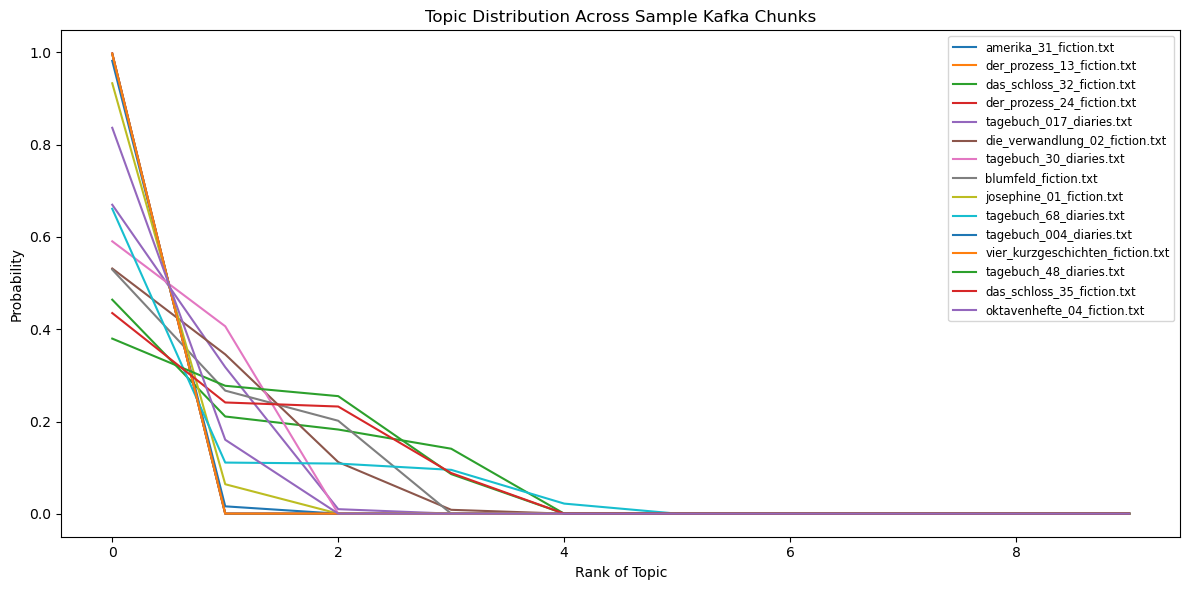

In [2]:
# topic probabilities 
document_topic_distributions = pd.read_csv(CSV_DIR / "document_topic_distributions.csv", index_col=0)

# sampling 20 documents and sorting topic weights by rank
sampled = document_topic_distributions.sample(15, random_state=42)
weights_ordered = sampled.apply(lambda row: row.sort_values(ascending=False).reset_index(drop=True), axis=1)

ax = weights_ordered.T.plot(figsize=(12, 6), legend=True)
ax.legend(sampled.index, loc='upper right', fontsize="small")
ax.set(
    xlabel='Rank of Topic',
    ylabel='Probability',
    title='Topic Distribution Across Sample Kafka Chunks'
)
plt.tight_layout()
plt.savefig(VISUALS_DIR / "kafka_topic_distribution_labeled.png")
plt.show()

#### 2. Dominant Topic Frequency 

In [3]:
# inspecting topic counts
doc_topic_df = pd.read_csv(CSV_DIR / "document_topic_distributions_with_dominant.csv", index_col=0)
# counting how often each topic is dominant
topic_counts = doc_topic_df["dominant_topic"].value_counts().sort_index()
print(topic_counts)

dominant_topic
Topic 0    16
Topic 1    20
Topic 2     7
Topic 3    16
Topic 4    13
Topic 5    55
Topic 6    23
Topic 7    45
Topic 8    52
Topic 9    24
Name: count, dtype: int64


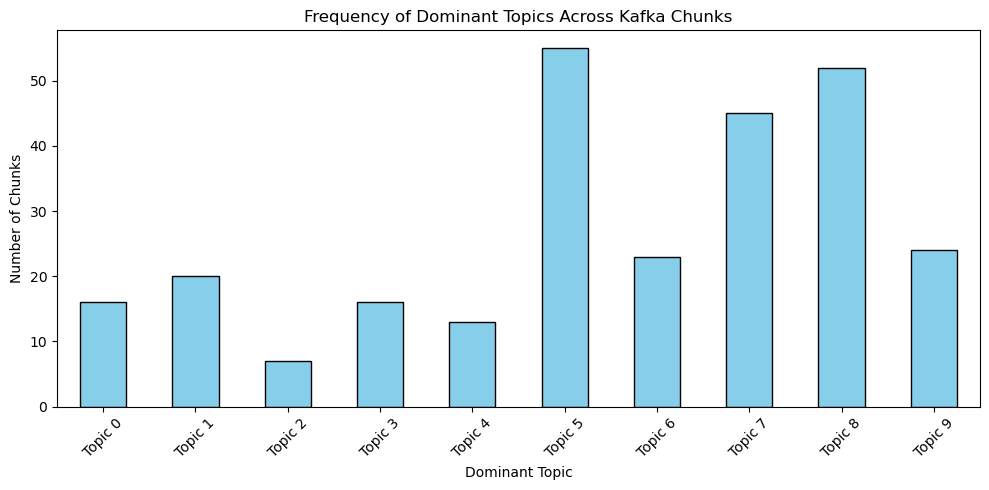

In [4]:
plt.figure(figsize=(10, 5))
topic_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Frequency of Dominant Topics Across Kafka Chunks")
plt.xlabel("Dominant Topic")
plt.ylabel("Number of Chunks")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(VISUALS_DIR / "dominant_topic_frequencies.png")
plt.show()

#### 3. Sorted Dominant Topics 

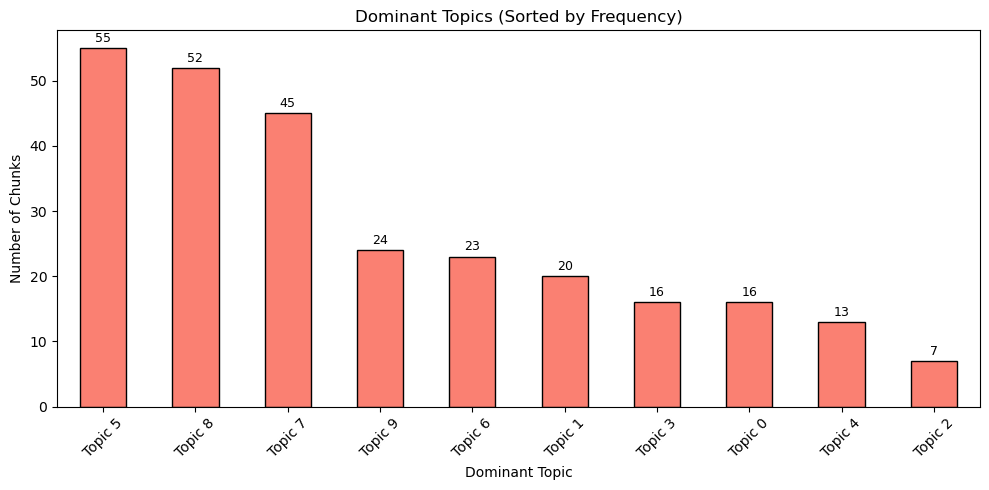

In [5]:
topic_counts_sorted = doc_topic_df["dominant_topic"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = topic_counts_sorted.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Dominant Topics (Sorted by Frequency)")
plt.xlabel("Dominant Topic")
plt.ylabel("Number of Chunks")
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(topic_counts_sorted.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.savefig(VISUALS_DIR / "dominant_topics_sorted_annotated.png")
plt.show()

#### 4. Percentage Distribution of Dominant Topics  

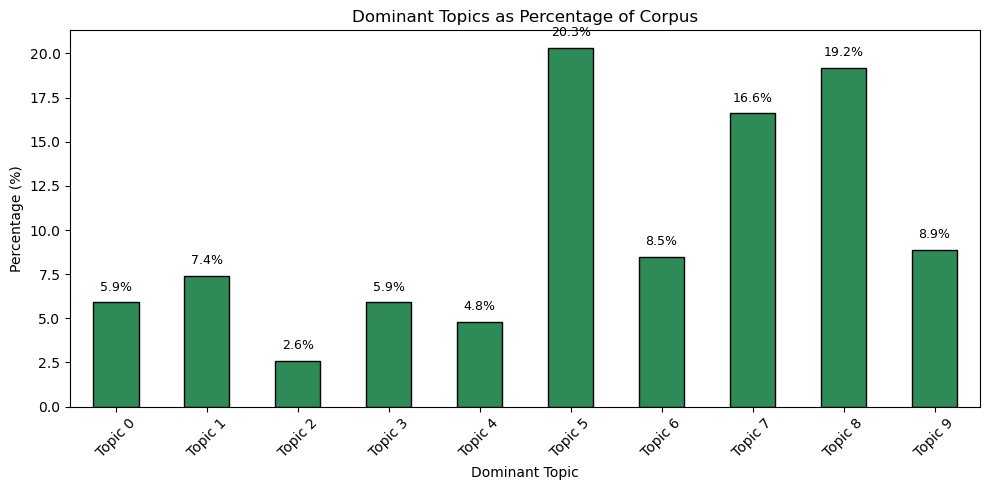

In [6]:
# percentages
topic_counts = doc_topic_df["dominant_topic"].value_counts().sort_index()
topic_percentages = (topic_counts / topic_counts.sum()) * 100

plt.figure(figsize=(10, 5))
ax = topic_percentages.plot(kind="bar", color="seagreen", edgecolor="black")
plt.title("Dominant Topics as Percentage of Corpus")
plt.xlabel("Dominant Topic")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(topic_percentages.values):
    ax.text(i, value + 0.5, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

plt.savefig(VISUALS_DIR / "dominant_topics_percentage_annotated.png")
plt.show()

#### 5. Top Documents per Topic

This script shows the top documents for each topic. Change the number in

top_docs = topic_probs_only[topic].nlargest(20).index.tolist()""

to get more or less top documents. 

In [ ]:
# loading the document-topic matrix with dominant topic
doc_topic_df = pd.read_csv(CSV_DIR / "document_topic_distributions_with_dominant.csv", index_col=0)

# drop the 'dominant_topic' column to get only probabilities
topic_probs_only = doc_topic_df.drop(columns=["dominant_topic"])

# top 3 documents for each topic
top_docs_per_topic = {}
for topic in topic_probs_only.columns:
    top_docs = topic_probs_only[topic].nlargest(5).index.tolist()
    top_docs_per_topic[topic] = top_docs

for topic, docs in top_docs_per_topic.items():
    print(f"\nTop documents for {topic}:")
    for doc in docs:
        print(f" - {doc}")


Top documents for Topic 0:
 - forschunges_eines_hundes_03_fiction.txt
 - forschunges_eines_hundes_01_fiction.txt
 - forschunges_eines_hundes_07_fiction.txt
 - forschunges_eines_hundes_09_fiction.txt
 - der_riesenmaulwurf_03_fiction.txt

Top documents for Topic 1:
 - der_prozess_10_fiction.txt
 - das_schloss_28_fiction.txt
 - das_schloss_46_fiction.txt
 - der_prozess_04_fiction.txt
 - oktavenhefte_12_fiction.txt

Top documents for Topic 2:
 - der_prozess_19_fiction.txt
 - der_prozess_29_fiction.txt
 - oktavenhefte_08_fiction.txt
 - elf_soehne_fiction.txt
 - der_prozess_20_fiction.txt

Top documents for Topic 3:
 - das_schloss_03_fiction.txt
 - das_schloss_40_fiction.txt
 - das_schloss_01_fiction.txt
 - tagebuch_59_diaries.txt
 - amerika_09_fiction.txt

Top documents for Topic 4:
 - die_verwandlung_06_fiction.txt
 - der_prozess_01_fiction.txt
 - der_prozess_25_fiction.txt
 - die_verwandlung_07_fiction.txt
 - das_schloss_21_fiction.txt

Top documents for Topic 5:
 - tagebuch_78_diaries.t

####  6. Topic Similarity Heatmap

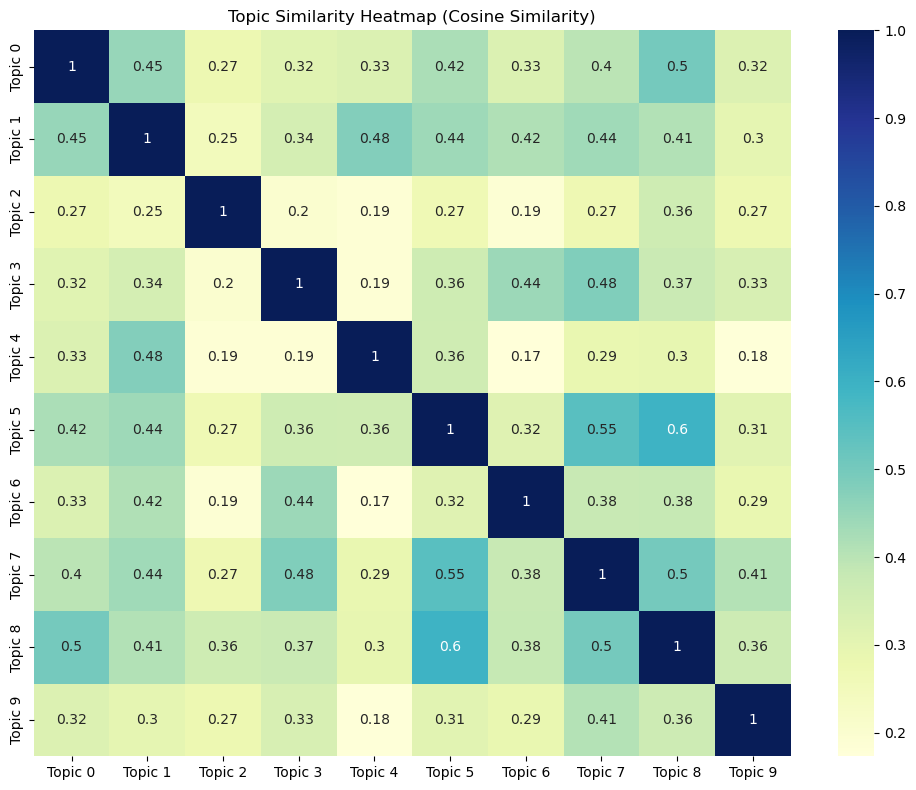

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# topic-word distributions
topic_word_distributions = pd.read_csv(CSV_DIR / "topic_word_distributions.csv", index_col=0)

# cosine similarity between topics
similarity_matrix = cosine_similarity(topic_word_distributions.values)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=topic_word_distributions.index,
            yticklabels=topic_word_distributions.index, annot=True, cmap="YlGnBu")

plt.title("Topic Similarity Heatmap (Cosine Similarity)")
plt.tight_layout()
plt.savefig(VISUALS_DIR / "topic_similarity_heatmap.png")
plt.show()

#### 7. Topic Sparsity

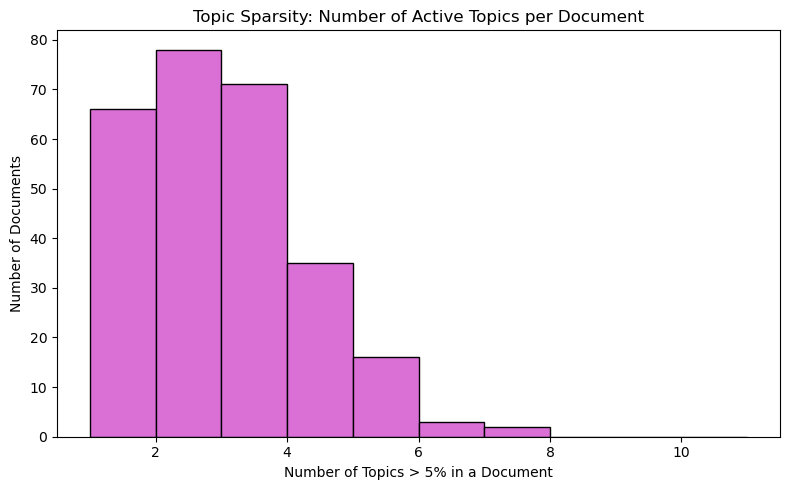

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# loading document-topic distributions
doc_topic_df = pd.read_csv(CSV_DIR / "document_topic_distributions.csv", index_col=0)

# threshold to consider a topic as >>> active topics <<< in a document
threshold = 0.05

# Counting how many topics 
active_topic_counts = (doc_topic_df > threshold).sum(axis=1)

plt.figure(figsize=(8, 5))
active_topic_counts.plot(kind="hist", bins=range(1, NUM_TOPICS + 2), color="orchid", edgecolor="black")
plt.title("Topic Sparsity: Number of Active Topics per Document")
plt.xlabel("Number of Topics > 5% in a Document")
plt.ylabel("Number of Documents")
plt.tight_layout()

plt.savefig(VISUALS_DIR / "topic_sparsity_histogram.png")
plt.show() 

#### 8. Topic Co-occurrence Matrix

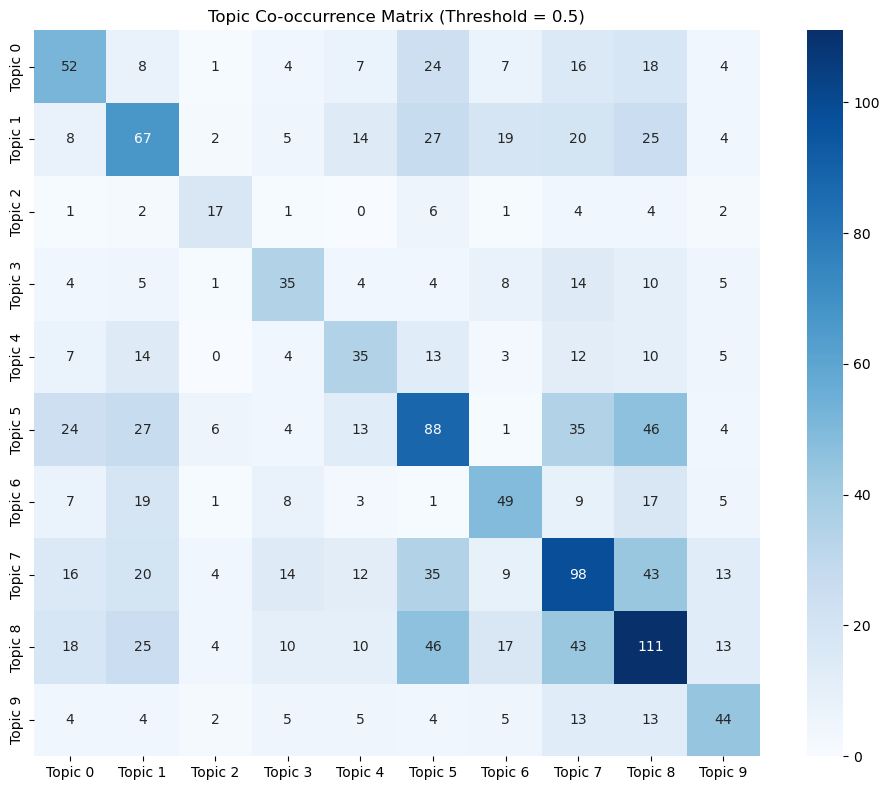

In [ ]:
import seaborn as sns

# document-topic distribution
doc_topic_df = pd.read_csv(CSV_DIR / "document_topic_distributions.csv", index_col=0)

# making topic presence to binary: 1 if topic prob > 0.1, else 0
binary_matrix = (doc_topic_df > 0.1).astype(int)

# co-occurrence matrix
co_occurrence = binary_matrix.T.dot(binary_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues", cbar=True, square=True)
plt.title("Topic Co-occurrence Matrix (Threshold = 0.5)")
plt.tight_layout()

plt.savefig(VISUALS_DIR / "topic_cooccurrence_matrix.png")
plt.show()

#### 9. Word Contribution Histograms for Each Topic

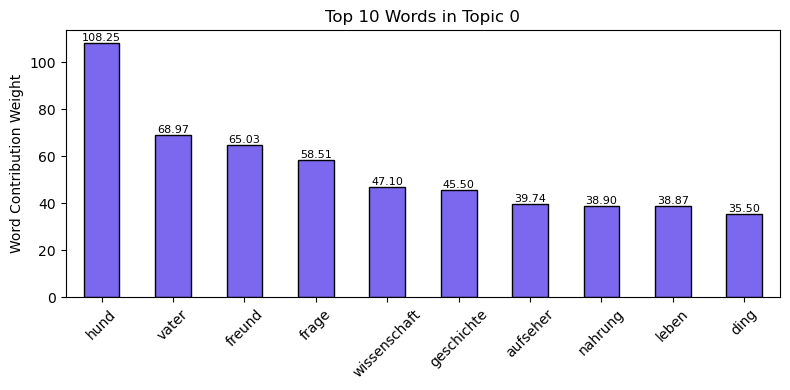

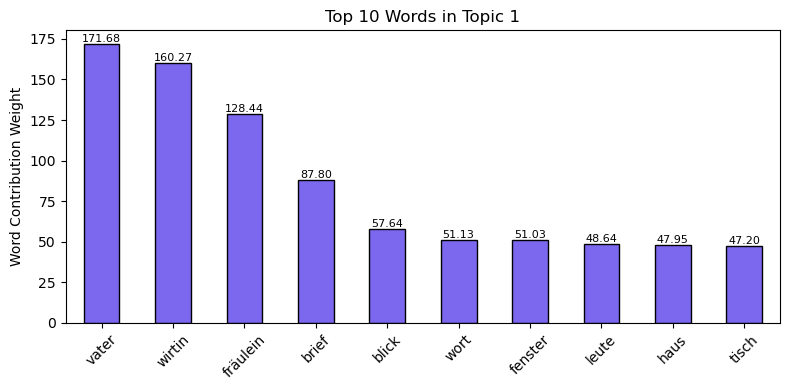

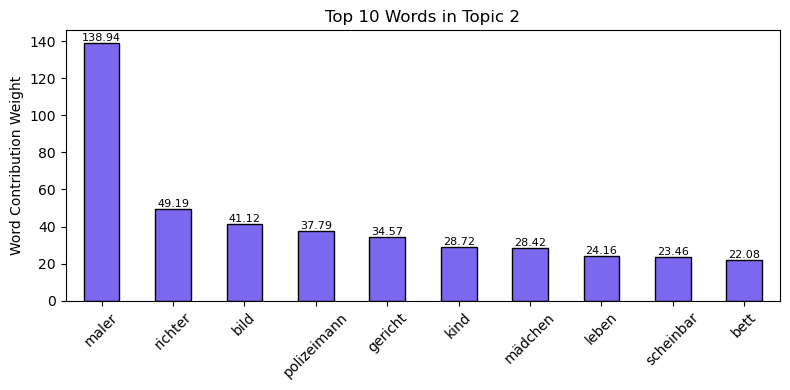

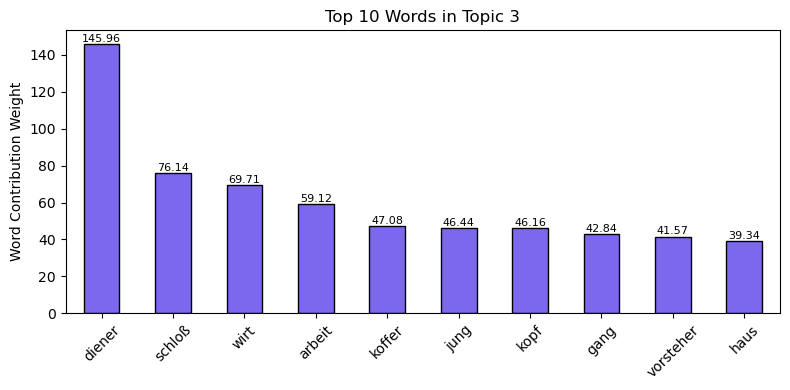

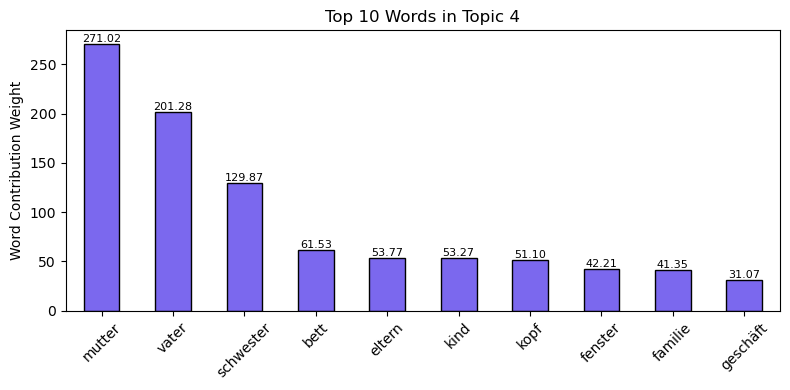

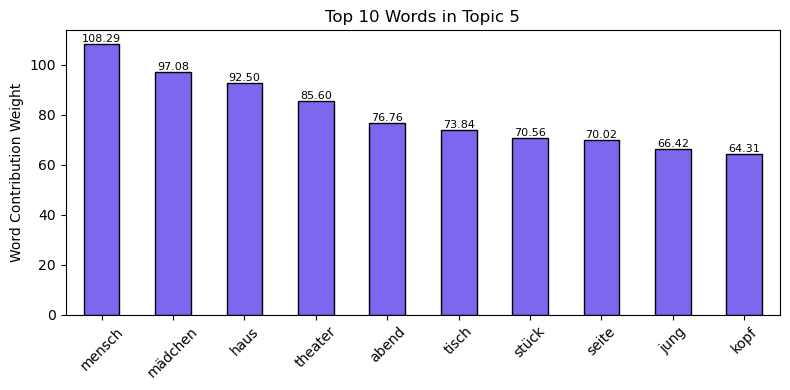

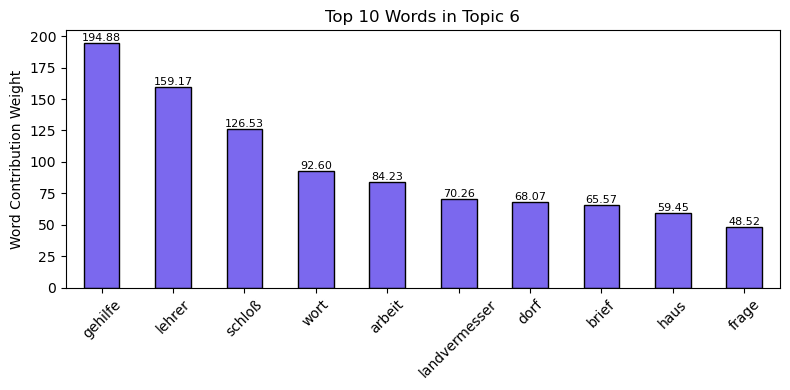

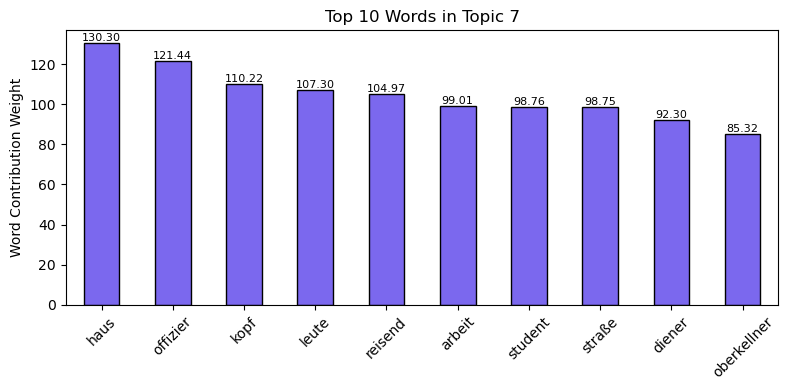

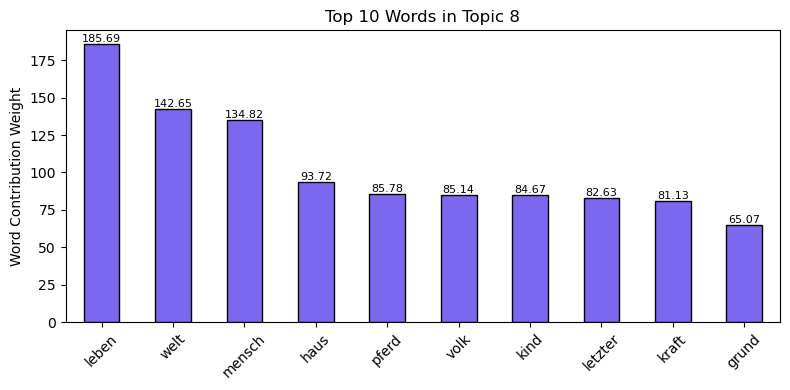

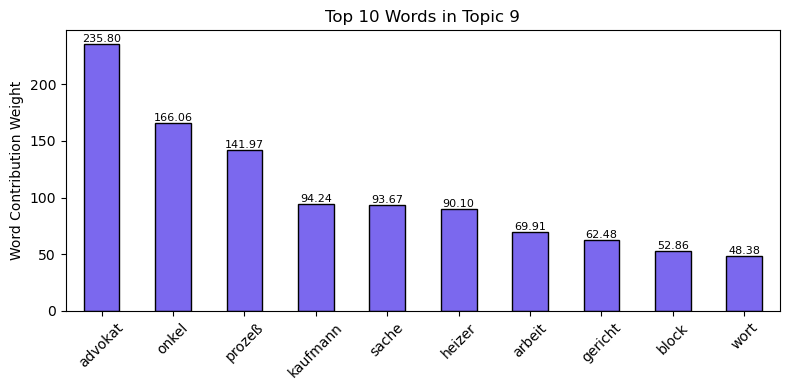

In [ ]:
# topic-word distribution
topic_word_df = pd.read_csv(CSV_DIR / "topic_word_distributions.csv", index_col=0)

for topic_name in topic_word_df.index:
    topic_series = topic_word_df.loc[topic_name].sort_values(ascending=False)[:10]

    plt.figure(figsize=(8, 4))
    ax = topic_series.plot(kind="bar", color="mediumslateblue", edgecolor="black")
    plt.title(f"Top 10 Words in {topic_name}")
    plt.ylabel("Word Contribution Weight")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # annotation
    for i, value in enumerate(topic_series.values):
        ax.text(i, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=8)

    plt.savefig(VISUALS_DIR / f"{topic_name}_word_contributions.png")
    plt.show()

#### 10. cross-topic word overlap analysis 

In [ ]:
import pandas as pd
from collections import Counter

# topic-word distributions
topic_word_df = pd.read_csv(CSV_DIR / "topic_word_distributions.csv", index_col=0)

# top n words per topic
top_n = 10
top_words_per_topic = {
    topic: topic_word_df.loc[topic].sort_values(ascending=False).head(top_n).index.tolist()
    for topic in topic_word_df.index
}

# flatting all top words and count their frequency across topics
all_top_words = [word for words in top_words_per_topic.values() for word in words]
word_topic_counts = Counter(all_top_words)

# making DF
word_overlap_df = pd.DataFrame.from_dict(word_topic_counts, orient='index', columns=["topic_count"])
word_overlap_df = word_overlap_df.sort_values(by="topic_count", ascending=False)

# repeated words
print("Words appearing in many topics:")
display(word_overlap_df.head(15))

# CSV making
word_overlap_df.to_csv(CSV_DIR / "word_topic_overlap.csv")

Words appearing in many topics:


,topic_count
haus,6
kopf,4
arbeit,4
vater,3
leben,3
kind,3
wort,3
leute,2
jung,2
schloß,2
